<a href="https://colab.research.google.com/github/victorknox/wordbeach/blob/main/wordcloudtel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

Obtaining a list of telugu articles


In [ ]:
import requests
from urllib.request import urlopen
import pickle
from bs4 import BeautifulSoup
home_url = 'https://te.wikipedia.org/'
links = ['https://te.wikipedia.org/wiki/%E0%B0%B5%E0%B0%B0%E0%B1%8D%E0%B0%97%E0%B0%82:%E0%B0%B5%E0%B0%BF%E0%B0%9C%E0%B1%8D%E0%B0%9E%E0%B0%BE%E0%B0%A8_%E0%B0%B6%E0%B0%BE%E0%B0%B8%E0%B1%8D%E0%B0%A4%E0%B1%8D%E0%B0%B0%E0%B0%AE%E0%B1%81']

 
# url = 'https://te.wikipedia.org/wiki/%E0%B0%B5%E0%B0%B0%E0%B1%8D%E0%B0%97%E0%B0%82:%E0%B0%B5%E0%B0%BF%E0%B0%9C%E0%B1%8D%E0%B0%9E%E0%B0%BE%E0%B0%A8_%E0%B0%B6%E0%B0%BE%E0%B0%B8%E0%B1%8D%E0%B0%A4%E0%B1%8D%E0%B0%B0%E0%B0%AE%E0%B1%81'
# reqs = requests.get(url)
# soup = BeautifulSoup(reqs.text, 'html.parser')
 
# urls = []
# for link in soup.find_all('a'):
#     print(link.get('href'))

all_links = []

# Main code
prev_len = 0
for link in links:    
    while link:
        html_doc = ''
        with urlopen(link) as response:
            for line in response:
                line = line.decode('utf-8')
                html_doc = html_doc + line.replace('\n','')
            soup = BeautifulSoup(html_doc, 'html.parser')
            div = soup.find('div',{'class':'mw-allpages-body'})
            if div:
                anchors = div.find_all('a');
                all_links = all_links + [home_url + anchor['href'] for anchor in anchors]
                print(len(set(all_links)))
            if prev_len == len(set(all_links)):
                break
            nav_div = soup.find('div',{'class':'mw-allpages-nav'})
            if nav_div and len(nav_div.find_all('a')) == 2:
                link = home_url + nav_div.find_all('a')[1]['href']
            prev_len = len(set(all_links))

for link in all_links:
  print(link)


# A) Corpus Collection


In [ ]:
import requests
from bs4 import BeautifulSoup

# Used bash script to get a list of titles
# ["Science","Nature","Astronomy","Universe","Solar_System","Sun","Mercury","Venus","Earth","Moon","Mars","Former_Jupiter","Saturn","Uranus","Neptune","Delisted_Asteroid","Former_Big_Bang","Former_Black_hole","Former_Comet","Galaxy","Milky_Way","Natural_satellite","Orbit","Outer_space","Physical_cosmology","Planet","Star","Supernova"]
# ,"Scientific_method", Measurement","International_System_of_Units","Subatomic_particle","Electron","Neutron","Former_Photon","Proton","Former_Quantum_mechanics",Radioactive_decay","Space","Vacuum","Delisted_Thermodynamics","Heat","Temperature","Theory_of_relativity","Speed_of_light","Wave","Delisted_Physics","Energy","Time","Day","Year","Classical_mechanics","Electromagnetic_radiation","Light","Color","Optics","Delisted_Sound","Biology","Life","Delisted_Cell","Death","Suicide","Abiogenesis","Evolution","Mass","Momentum","Motion","Newton's_laws_of_motion","Human_evolution","Failed_candidate_Natural_selection","Force","Electromagnetism","Gravity","Strong_interaction","Weak_interaction","Magnetism","Matter","State_of_matter","Organism","Archaea","Bacteria","Eukaryote","Animal","Zoology","Amphibian","Arthropod","Former_Atom_","Particle_physics","Standard_Model","Delisted_Insect","Bird","Fish","Mammal","Former_Cat","Cattle","Dog","Horse","Primate","Former_Human","Rodent","Reptile","Dinosaur","Plant","Botany","Flower","Seed","Tree","Algae","Fungus","Virus","Anatomy","Human_body","Circulatory_system","Blood","Heart","Lung","Digestion","Liver","Immune_system","Skin","Muscle","Nervous_system","Brain","Ear","Eye","Sense","Skeleton","Ecology","Biodiversity","Ecosystem","Extinction","Genetics","DNA","Former_Gene","Heredity","RNA","Metabolism","Molecular_biology","Start-Class_article_Hormone","Protein","Paleontology","Photosynthesis","Reproduction","Sex","Pregnancy","Sleep","Taxonomy","Species","Chemistry","Biochemistry","Inorganic_chemistry","Organic_chemistry","Physical_chemistry","Chemical_element","Periodic_table","Aluminium","Carbon","Copper","Gold","Hydrogen","Iron","Nitrogen","Oxygen","Phosphorus","Silicon","Failed_candidate_Silver","Sulfur","Start-Class_article_Chemical_compound","Delisted_Water","Delisted_Carbon_dioxide","Chemical_bond","Molecule","Chemical_reaction","Acid–base_reaction","Catalysis","Redox","Metal","Alloy","Bronze","Steel","Earth_science","History_of_Earth","Atmosphere_of_Earth","Structure_of_Earth","Season","Flood","Climate_","Climate_change","Weather","Cloud","Rain","Snow","Tornado","Symbol_question.svg_Former_Tropical_cyclone","Wind","Geology","Earthquake","Erosion","Mineral","Former_Plate_tectonics","Rock","Soil","Delisted_Volcano"
url_list = all_links
print("List of articles: ")
for i in url_list:
  # url = "https://en.wikipedia.org/wiki/" + i (english articles)
  url = i
  print(i)
  # ping a website or portal for information
  res = requests.get(url)
  html_page = res.content

  soup = BeautifulSoup(html_page, 'html.parser')
  # Python library that is used for web scraping purposes to pull the data out of HTML and XML files
  text = soup.find_all(text=True)

  output = ''
  extractlist = [
      'p',
      'h1',
      'h2',
      'h3',
      'h4',
      'h5',
      'h6',
      'b',
      'a'
  ]

  for t in text:
      if t.parent.name in extractlist:
          output += '{} '.format(t)
    
  # print(output)
  f = open("text.txt", "a")
  f.write(output)
  f.close()

List of articles: 


## Counting the number of sentences


In [100]:
# Opening a file
file = open("text.txt","r")
Counter = 0
  
# Reading from file
Content = file.read()
CoList = Content.split(".")
  
for i in CoList:
    if i:
        Counter += 1
          
print("This is the number of lines in the file")
print(Counter)

This is the number of lines in the file
20777


## Cleaning the text


In [101]:
# cleaning text
import re

x = Content
# removing all english characters
x = re.sub("[A-Za-z]", "", x)
# Remove numbers
x = re.sub(r'\w*\d+\w*', '', x)
# Replace the over spaces
x = re.sub('\s{2,}', " ", x)
# Removing punctuations
my_punct = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',','.',
           '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', 
           '`', '{', '|', '}', '~', '»', '«', '“', '”']

punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")
x = re.sub(punct_pattern, "", x)
# Taking only telugu unicode characters and spaces
x = re.sub("[^ \u0c00-\u0c7f]", "", x)

f = open("text.txt", "w")
f.write(x)
f.close()


# Telugu


In [77]:
pip install indic-nlp-library

     |████████████████████████████████| 40kB 4.9MB/s 
     |████████████████████████████████| 9.2MB 13.6MB/s 
     |████████████████████████████████| 552kB 35.2MB/s 
  Created wheel for sphinx-argparse: filename=sphinx_argparse-0.2.5-cp37-none-any.whl size=11552 sha256=2a6b4a95fc818d9fde52425796b01c03abec3dd9c1f7a86f699efd2c07f3497d
  Stored in directory: /root/.cache/pip/wheels/2a/18/1b/4990a1859da4edc77ab312bc2986c08d2733fb5713d06e44f5
Successfully built sphinx-argparse
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1


In [79]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 133 (delta 0), reused 2 (delta 0), pack-reused 126
Receiving objects: 100% (133/133), 149.77 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [80]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git

Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 1325, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 1325 (delta 84), reused 89 (delta 41), pack-reused 1178
Receiving objects: 100% (1325/1325), 9.57 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (688/688), done.


In [81]:
import sys
from indicnlp import common

# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"indic_nlp_resources"

# Add library to Python path
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))

# Set environment variable for resources folder
common.set_resources_path(INDIC_NLP_RESOURCES)

#Tokenization


In [132]:
file = open("text.txt","r")
x = file.read()
from indicnlp.tokenize import indic_tokenize  

indic_string = x 

tokens = []
print('Input String: {}'.format(indic_string))
print('Tokens: ')
for t in indic_tokenize.trivial_tokenize(indic_string): 
    tokens.append(t)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [133]:
len(tokens)

213261

In [137]:
from collections import Counter

final = tokens
# removing wiki related junk words
stopwords =['చేయగలిగింది', 'గురించి', 'పై', 'ప్రకారం', 'అనుగుణంగా', 'అడ్డంగా', 'నిజంగా', 'తర్వాత', 'తర్వాత', 'మళ్ళీ', 'వ్యతిరేకంగా', 'కాదు', 'అందరూ', 'అనుమతించు', 'అనుమతిస్తుంది', 'దాదాపు', 'మాత్రమే', 'వెంట', 'ఇప్పటికే', 'కూడా', 'అయితే', 'ఎప్పుడు', 'వద్ద', 'మధ్య', 'మధ్య', 'ఒక', 'మరియు', 'మరొక', 'ఏ', 'ఎవరో ఒకరు', 'ఏమైనప్పటికి', 'ఎవరైనా', 'ఏదైనా', 'ఏమైనప్పటికి', 'ఎక్కడైనా', 'వేరుగా', 'కనిపిస్తాయి', 'మెచ్చుకో', 'తగిన', 'ఉన్నారు', 'కాదు', 'చుట్టూ', 'గా', 'ఒక ప్రక్కన', 'అడగండి', 'అడగడం', 'సంబంధం', 'వద్ద', 'అందుబాటులో', 'దూరంగా', 'ఈ', 'పేజీ', 'పేజీలు', 'గురించి', 'మార్చు', 'వికీపీడియా', 'మే', 'ఒక', 'నుండి', 'కూడా', 'లో', 'ఆ', 'కి', 'సంబంధించిన', 'ఓ']
for word in list(final):  
  if word in stopwords:
      final.remove(word)

counts = Counter(final)
final = counts.most_common(50)


mylist = []
print("Final List of words according to their importance: ")
for key, value in final:
  print(key)
  mylist.append(key)

output=('\n').join(mylist)

f = open("output.txt", "w")
f.write(output)
f.close()

Final List of words according to their importance: 
మార్పులు
చర్చ
ఎక్కింపు
జనవరి
మార్చి
రోజు
భాజపా
ఏప్రిల్
రోజున
అల్యూమినియం
జూన్
ఫిబ్రవరి
జూలై
చరిత్రలో
నక్షత్రం
ఆగష్టు
రోజులు
మొదటి
కొత్త
ప్రత్యేక
రూపంలో
చరిత్ర
భారత
విధానం
ప్రకటన
సమాచారం
మొబైల్
సంబంధిత
శాశ్వత
వ్యాసం
ఇటీవలి
దస్త్రం
ఖాతా
చదువు
పందిరి
ఇక్కడికి
పేజీని
కూర్పు
వీక్షణ
గణాంకాలు
యాదృచ్ఛిక
సంప్రదింపు
మార్గదర్శకపు
మెనూ
మార్పుచేర్పులు
సృష్టించుకోండి
లాగినవండి
రచ్చబండ
విరాళాలు
సహాయసూచిక


# Visualization


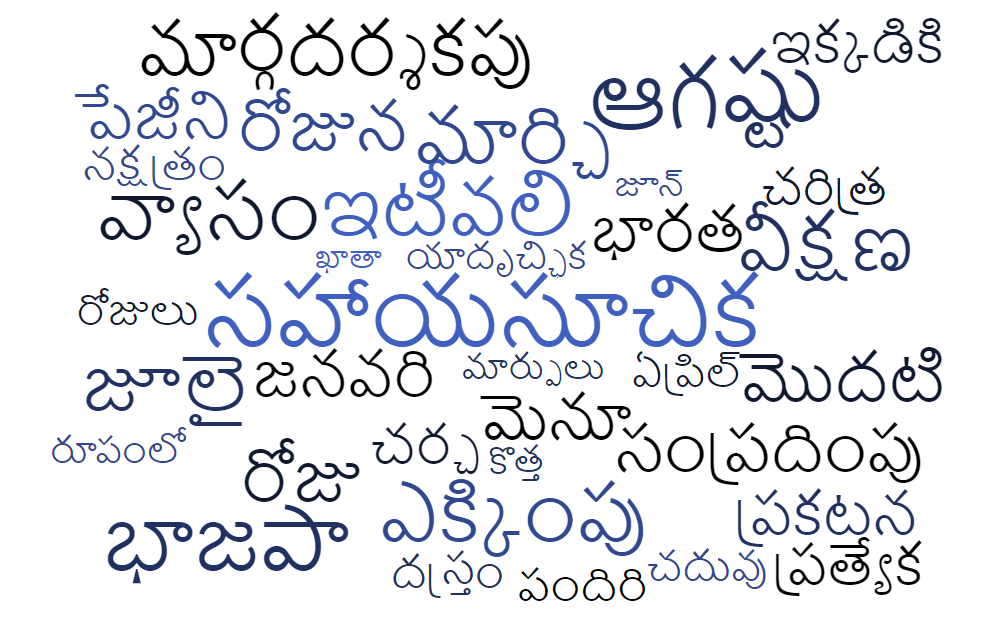